In [12]:
!pip install pytrends requests beautifulsoup4 openai
from pytrends.request import TrendReq
import requests
from bs4 import BeautifulSoup
from openai import OpenAI
import json, datetime

client = OpenAI()
today = datetime.date.today()


In [13]:
import os
import getpass
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key:")

Enter your OpenAI API key:··········


In [14]:
url = "https://www.sherwin-williams.com/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

# extract text snippets (headlines, links, etc.)
headlines = [h.get_text(strip=True) for h in soup.find_all("h2")][:5]
headlines
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["home painting", "paint colors 2025", "wall design trends"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

trends = pytrends.interest_over_time()
trends.tail()


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,home painting,paint colors 2025,wall design trends,isPartial
date,,,,
2025-08-31,93,52,4,False
2025-09-07,86,43,3,False
2025-09-14,51,10,0,False
2025-09-21,45,9,0,False
2025-09-28,61,11,0,True


In [15]:
headlines = ["Color of the Year 2025: Blue Nova", "Top Warm Neutrals for Interiors"]
kw_list = ["paint colors 2025", "home painting ideas", "wall design trends"]

prompt = f"""
You are CALYCO’s AI Content Engine.
Competitor inspirations: {headlines}.
Google Trends keywords: {', '.join(kw_list)}.

1. Write a long-form blog article on 2025 paint trends (Calcyo style).
2. Write a short trend-based creative idea (social media friendly).
3. Write an FAQ/How-to post about choosing the right paint finish.
"""
resp = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role":"user","content":prompt}]
)

print(resp.choices[0].message.content)


# 2025 Paint Trends: A Vibrant Journey into Color

As we step into 2025, the intersection of art, technology, and nature is shaping the paint trends that will define our living spaces. Homeowners and designers alike are discovering that color is not just a visual choice; it is an expression of personality, mood, and an essential element of interior well-being. What should we expect from the paint palette of the year ahead? Get ready for a colorful adventure!

## The Color of the Year: Blue Nova

Kicking off the trends for 2025 is the much-anticipated Color of the Year, **Blue Nova**. This shade embodies a deep, cosmic blue with hints of violet and emerald, echoing themes of exploration and innovation. Blue Nova invites serenity while also invoking an adventurous spirit, making it a perfect choice for both bold feature walls and soothing backdrops in bedrooms, living rooms, and creative spaces.

Using Blue Nova can create an inviting aura when paired with natural wood and greenery, offe

In [20]:
ai_content = resp.choices[0].message.content

# Save to file
with open("calyco_content.txt", "w") as f:
    f.write(ai_content)

print("✅ Content generated and saved to calyco_content.txt")


✅ Content generated and saved to calyco_content.txt


In [21]:
sections = ai_content.split("---")

print("Long-form article:\n", sections[0])
print("\nCreative:\n", sections[1])
print("\nFAQ/How-To:\n", sections[2])


Long-form article:
 # 2025 Paint Trends: A Vibrant Journey into Color

As we step into 2025, the intersection of art, technology, and nature is shaping the paint trends that will define our living spaces. Homeowners and designers alike are discovering that color is not just a visual choice; it is an expression of personality, mood, and an essential element of interior well-being. What should we expect from the paint palette of the year ahead? Get ready for a colorful adventure!

## The Color of the Year: Blue Nova

Kicking off the trends for 2025 is the much-anticipated Color of the Year, **Blue Nova**. This shade embodies a deep, cosmic blue with hints of violet and emerald, echoing themes of exploration and innovation. Blue Nova invites serenity while also invoking an adventurous spirit, making it a perfect choice for both bold feature walls and soothing backdrops in bedrooms, living rooms, and creative spaces.

Using Blue Nova can create an inviting aura when paired with natural woo

In [22]:
seo_snippet = {
  "@context": "https://schema.org",
  "@type": "Article",
  "headline": sections[0].splitlines()[0],  # first line of article as title
  "description": "AI-generated paint trends article by CALYCO.",
  "author": {"@type": "Organization", "name": "CALYCO AI Engine"},
  "datePublished": str(today)
}
print(json.dumps(seo_snippet, indent=2))


{
  "@context": "https://schema.org",
  "@type": "Article",
  "headline": "# 2025 Paint Trends: A Vibrant Journey into Color",
  "description": "AI-generated paint trends article by CALYCO.",
  "author": {
    "@type": "Organization",
    "name": "CALYCO AI Engine"
  },
  "datePublished": "2025-09-28"
}


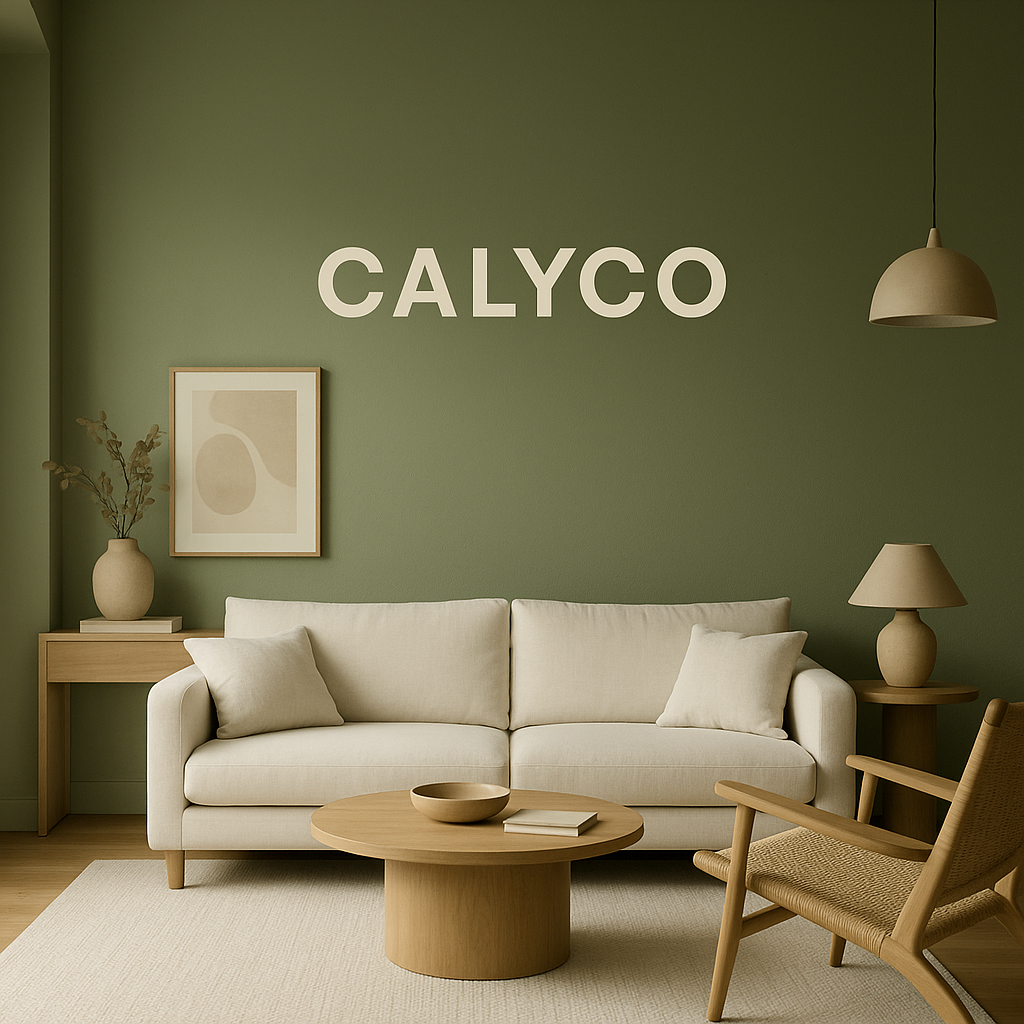

✅ Image saved as calyco_image.png


In [23]:
if hasattr(image.data[0], "url") and image.data[0].url:
    print("AI Image URL:", image.data[0].url)
elif hasattr(image.data[0], "b64_json") and image.data[0].b64_json:
    import base64
    from IPython.display import Image, display

    img_data = base64.b64decode(image.data[0].b64_json)
    with open("calyco_image.png", "wb") as f:
        f.write(img_data)

    display(Image(filename="calyco_image.png"))
    print("Image saved as calyco_image.png")
else:
    print("No image URL or base64 found in response")


In [24]:
image = client.images.generate(
    model="gpt-image-1",
    prompt="Modern living room painted in earthy green tones, minimalist decor, styled for Calyco brand",
    size="1024x1024"
)
print("AI Image URL:", image.data[0].url)


AI Image URL: None


In [45]:
today = datetime.date.today()

sitemap = f"""
<urlset xmlns="http://www.sitemaps.org/schemas/sitemap/0.9">
  <url>
    <loc>https://calyco.com/blog/2025-paint-trends</loc>
    <lastmod>{today}</lastmod>
    <priority>0.8</priority>
  </url>
</urlset>
"""

with open("sitemap.xml", "w") as f:
    f.write(sitemap)

print("Sitemap generated as sitemap.xml")
print(sitemap)


Sitemap generated as sitemap.xml

<urlset xmlns="http://www.sitemaps.org/schemas/sitemap/0.9">
  <url>
    <loc>https://calyco.com/blog/2025-paint-trends</loc>
    <lastmod>2025-09-28</lastmod>
    <priority>0.8</priority>
  </url>
</urlset>



In [27]:
urls = [
    {"loc": "https://calyco.com/blog/2025-paint-trends", "priority": "0.8"},
    {"loc": "https://calyco.com/blog/blue-nova-inspiration", "priority": "0.7"}
]

sitemap_entries = "\n".join([
    f"""  <url>
    <loc>{u['loc']}</loc>
    <lastmod>{today}</lastmod>
    <priority>{u['priority']}</priority>
  </url>""" for u in urls
])

sitemap = f"<urlset xmlns='http://www.sitemaps.org/schemas/sitemap/0.9'>\n{sitemap_entries}\n</urlset>"

print(sitemap)


<urlset xmlns='http://www.sitemaps.org/schemas/sitemap/0.9'>
  <url>
    <loc>https://calyco.com/blog/2025-paint-trends</loc>
    <lastmod>2025-09-28</lastmod>
    <priority>0.8</priority>
  </url>
  <url>
    <loc>https://calyco.com/blog/blue-nova-inspiration</loc>
    <lastmod>2025-09-28</lastmod>
    <priority>0.7</priority>
  </url>
</urlset>


In [32]:
article_html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>2025 Paint Trends: A Vibrant Journey into Color</title>
  <meta name="description" content="CALYCO AI Engine reimagines 2025 paint trends with Blue Nova, warm neutrals, and sustainable finishes.">
  <style>
    body {{ font-family: Arial, sans-serif; margin: 40px; line-height: 1.6; }}
    h1, h2 {{ color: #003366; }}
    .section {{ margin-bottom: 40px; }}
    .highlight {{ color: #1E90FF; font-weight: bold; }}
  </style>
</head>
<body>
  <h1>2025 Paint Trends: A Vibrant Journey into Color</h1>
  <p>As we step into 2025, the intersection of art, technology, and nature is shaping the paint trends...</p>

  <div class="section">
    <h2>The Color of the Year: <span class="highlight">Blue Nova</span></h2>
    <p>Kicking off the trends for 2025 is the much-anticipated Color of the Year, Blue Nova...</p>
  </div>

  <div class="section">
    <h2>Creative Social Media Idea</h2>
    <p>🌟 Trend Alert! 🌟 Say hello to 2025’s Color of the Year: <b>Blue Nova</b>! 🌌</p>
  </div>

  <div class="section">
    <h2>FAQ: Choosing the Right Paint Finish</h2>
    <ul>
      <li><b>Matte:</b> Best for low-traffic areas like bedrooms.</li>
      <li><b>Eggshell:</b> Easy to clean, perfect for living rooms.</li>
      <li><b>Satin:</b> Durable for kitchens and bathrooms.</li>
      <li><b>Semi-Gloss:</b> Great for trim and moldings.</li>
      <li><b>High Gloss:</b> Dramatic shine for cabinetry or accents.</li>
    </ul>
  </div>

  <p><i>Generated by CALYCO AI Engine – {date}</i></p>
</body>
</html>
""".format(date=today)

# Save file
with open("index.html", "w") as f:
    f.write(article_html)


print("✅ Blog saved as calyco_blog.html")


✅ Blog saved as calyco_blog.html


In [33]:
from google.colab import files
files.download("index.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Diagram saved as: calyco_pipeline.png


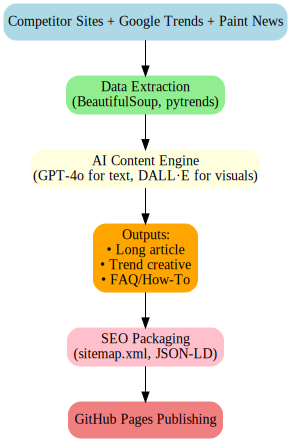

In [43]:
# Install graphviz if not already
!apt-get -qq install graphviz
!pip install graphviz

from graphviz import Digraph
from google.colab import files

# Create the diagram
dot = Digraph(format="png")

dot.attr(rankdir="TB")  # top to bottom flow

dot.node("A", "Competitor Sites + Google Trends + Paint News", shape="box", style="rounded,filled", color="lightblue")
dot.node("B", "Data Extraction\n(BeautifulSoup, pytrends)", shape="box", style="rounded,filled", color="lightgreen")
dot.node("C", "AI Content Engine\n(GPT-4o for text, DALL·E for visuals)", shape="box", style="rounded,filled", color="lightyellow")
dot.node("D", "Outputs:\n• Long article\n• Trend creative\n• FAQ/How-To", shape="box", style="rounded,filled", color="orange")
dot.node("E", "SEO Packaging\n(sitemap.xml, JSON-LD)", shape="box", style="rounded,filled", color="pink")
dot.node("F", "GitHub Pages Publishing", shape="box", style="rounded,filled", color="lightcoral")

# Connect arrows
dot.edges(["AB", "BC", "CD", "DE", "EF"])

# Save and render
output_path = dot.render("calyco_pipeline", format="png", cleanup=True)
print("✅ Diagram saved as:", output_path)

# Show diagram inline in the cell
dot


In [44]:
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>